In [1]:
import deepdoctection as dd
from pathlib import Path
import pandas as pd
import json
from matplotlib import pyplot as plt
pd.set_option('display.max_colwidth', None)

### Initialisierung

In [3]:
path = Path("/home/janis/Data/pedocs_meta_data")
pedocs_jsonl = path / "pedocs.jsonl"
df = dd.SerializerJsonlines.load(pedocs_jsonl)
df.reset_state()
all_items = []
for dp in df:
    all_items.append(dp)
    
df = pd.DataFrame.from_records(all_items)
all_doc_ids = set(df['doc_id'].tolist())

### Anzeige alle Dokumente (ca. 50 wurden prozessiert)

In [4]:
all_doc_ids

{'0010d9f89dc9cae63425a21f8d2e5be9a7798182',
 '008cc72e5e8c2abee046742cdb4dcd2028f98e96',
 '00a29717bf8bbe5b347e74fd4f805ea67f426389',
 '00d99913ea6d22776b2d44bc60ab836c4debfe9b',
 '00ed2e6f4970ddc170c54c70575397cfc7fa305d',
 '010ff6089430c82c94b3802a0a99234b585235a6',
 '0137267183c91ebcd723b1f8bfac9df071663fe0',
 '01382a9e4d12ac97d52edb4a5ef4e76fbd36d080',
 '016c92a67cf8209c456973b4ed18bbd6ca198911',
 '01afdfe1253574e3c043585443a926752a39bac3',
 '01b31937f2a4a6a324f715444c0db782c16b3ceb',
 '01c77fa7d972c28a35abd39445b0f2513170c963',
 '01ca88b13c3c8eb7f1c25f6f3a1334cc543b6b2d',
 '01ef71b57d779eaf80e3ea51dc1ed7d4f8eef91b',
 '01f291e33c53be0fbbc699d5a17203c23d28bf7b',
 '0214100601202926fb959151d4a02ebfaf1b6118',
 '0226b627d2fc61f0dde8466185a8e9df980dd0ad',
 '026d20c02c70a83f1ea51439b3f2fd27c85d0382',
 '029818abf24a4eae828e4fe78a64c824b3bbe6da',
 '02cefbeb2d07fa075da188db179bf3c5209c6bbe',
 '02e1bc62df2906fd2ec915923a6c02d5db3e74f4',
 '02ff7672e8ac6eab998137d18686c5ad7547193e',
 '034215ee

### Auswahl eines Dokumentes durch Angabe der `doc_id`

In [5]:
doc_id = "00d99913ea6d22776b2d44bc60ab836c4debfe9b"
all_elements = df[df['doc_id']==doc_id]

### Ausgabe aller cited items im Abschnitt Literatur und nachfolgenden Textblocks

Ein Dokument kann mehrere Seiten (file_name) enthalten. Ihre Nummerierung im Dokument sind durch _k.pdf gekennzeichnet

In [6]:
all_elements

,doc_id,file_name,annotation_id,text,page_num
147,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_0.pdf,c7f1c075-aad5-36ef-a163-1f76ee7eb500,ANALYSE DER LEBENSSITUATION VON ÄALLEINERZIEHENDEN IN SCHLESWIG-HOLSTEIN. Gutachten im Auftrag der Parlamentarischen Staatssekretärin für Familie und soziale Verbände im SOZIALMINISTERIUM DES LANDES SCHLESWIG-HoLSTEIN. Kiel 1986.,0
148,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_0.pdf,b006f31e-a9df-3eea-8aaf-14696758ccea,"Beck, U.: Risikogesellschaft. Auf dem Weg in eine andere Moderne. Frankf. 1986.",0
149,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_1.pdf,b1ead0b6-5776-3d63-a1e9-a05c190cebc3,"ZIEHE, TH.: Plädoyer für ungewöhnliches Lernen. Ideen zur Jugendsituation. Reinbek 1982.",1
150,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_1.pdf,37407c0e-5dd7-3841-a816-55bb135d84dc,"HEINEMANN, K./Lüdes, P.: Zeitbewußtsein und Kontrolle der Zeit. In: HAmME- RICH/KLEIN (Hrsg.): Materialien zur Soziologie des Alltags. Opladen 1978, S. 220-243.",1
151,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_1.pdf,42f23d91-2f4b-3081-b1e3-811883dd364f,"LAnGer,‚I.: Familie im Wandel. In: Frauenforschung. Hrsg. v. InsTITUT FRAU UND GESELLSCHAFT. 1987, H. 1-2, S. 165-188.",1
152,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_1.pdf,0be99dda-e272-3d98-baf5-1d14f2281524,"NAPP-PETERS, A.: Ein-Elternteil-Familien. Soziale Randgruppe oder neues familiales Selbstverständnis? München 21987.",1
153,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_1.pdf,27f94460-30a4-3d52-9cae-993004c6c335,"SWIENTEK, CH.: Alleinerziehende - Familien wie andere auch? Zur Lebenssituation von Ein-Eltern-Familien. Bielefeld 1984.",1
154,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_1.pdf,1ffa919e-b4be-3bd4-9eb7-05249b324e05,Changes in Family Structures and their Impact on the Upbringing and Education of Children and Adolescents - A Topic of Public Interest,1
155,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_1.pdf,8a19cf67-a507-39b9-91c8-93244937ec81,"SPREY-WESSING, T.: Trennung der Eltern - Betroffenheit der Kinder. In: Theorie und Praxis der sozialen Arbeit 33 (1982), H. 3, S. 105-113.",1
156,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_1.pdf,80b05127-59ed-390c-8670-9bae0620813d,"Proceeding from an analysis of recent empirical studies on the situation of single parents, the author traces the apparent contradicition of a high level of stress and strain on the one hand and a high potential of satisfaction on the other. The author concentrates on the situation of single women with children, a group that constitutes 86% of all single parents. Sociopolitical and ecudational measures are proposed and it is urgently requested to give the same weight to the tasks ofthe education and upbringing of children and adolescents in single-parent families compared as to the attention received by the methods of intervention that dominate the present discussion.",1


### Ansicht der Originalseite

Auswahl `file_name`. Die Anzeige wird auf die Textblöcke innerhalb der Seite gefiltert

In [7]:
file_name = "00d99913ea6d22776b2d44bc60ab836c4debfe9b_0.pdf"
path_file_name = path / file_name.replace(".pdf",".json")

with open(path_file_name, "r") as file:
    out = json.load(file)
    image = dd.Page.from_dict(**out)
    page = dd.Page.from_image(image,dd.LayoutType.word, [dd.LayoutType.text, 
                                                         dd.LayoutType.title, 
                                                         dd.LayoutType.list, 
                                                         dd.LayoutType.table, 
                                                         dd.LayoutType.figure,])

all_elements_one_page = df[df['file_name']==file_name]
all_elements_one_page

,doc_id,file_name,annotation_id,text,page_num
147,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_0.pdf,c7f1c075-aad5-36ef-a163-1f76ee7eb500,ANALYSE DER LEBENSSITUATION VON ÄALLEINERZIEHENDEN IN SCHLESWIG-HOLSTEIN. Gutachten im Auftrag der Parlamentarischen Staatssekretärin für Familie und soziale Verbände im SOZIALMINISTERIUM DES LANDES SCHLESWIG-HoLSTEIN. Kiel 1986.,0
148,00d99913ea6d22776b2d44bc60ab836c4debfe9b,00d99913ea6d22776b2d44bc60ab836c4debfe9b_0.pdf,b006f31e-a9df-3eea-8aaf-14696758ccea,"Beck, U.: Risikogesellschaft. Auf dem Weg in eine andere Moderne. Frankf. 1986.",0


### Ansicht `file_name`

Setzen von show_layouts=True zeigt die Textblöcke an, die im Feld text angezeigt werden. 

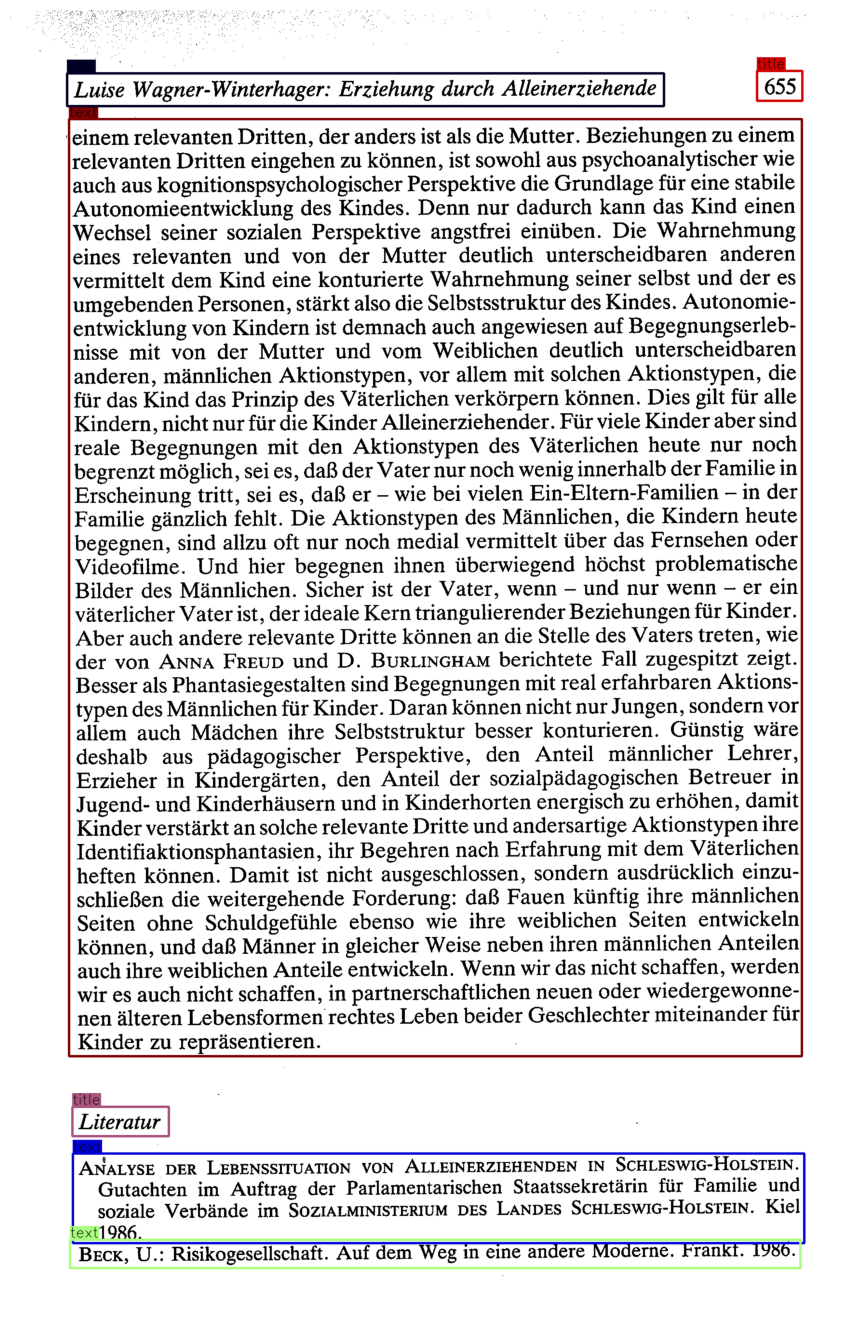

In [8]:
image = page.viz(interactive=False, show_layouts=True)
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)